<a href="https://colab.research.google.com/github/wonwooddo/My_python_cheatsheet/blob/master/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 깔끔한 style로 설정

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

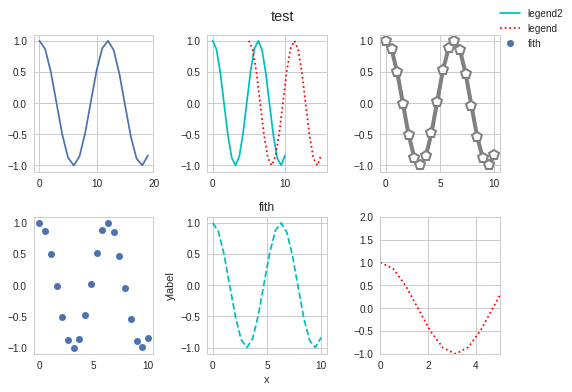

In [2]:
x=np.linspace(0, 10, 20)
y=np.cos(x)

fig, ax = plt.subplots(2, 3)

fig.suptitle('test')
ax[0, 0].plot(y)
ax[0, 1].plot(x, y, '-c', label="legend2")
ax[0, 1].plot(x+5, y, ':r', label="legend")
ax[0, 2].plot(x, y, '-p', color='gray', markersize=10, linewidth=4, markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2)

ax[1, 0].plot(x, y, 'o', label='fith'); ax[1, 0].grid(False)
ax[1, 1].plot(x, y, '--c'); ax[1, 1].set(xlabel="x", ylabel="ylabel", title="fith")
ax[1, 2].plot(x, y, ':r') ; ax[1, 2].set(xlim=(0, 5), ylim=(-1, 2))
fig.tight_layout(rect=[0, 0, 0.9, 0.95])
fig.legend(loc=1)
plt.show()

## 각 점의 속성(크기, 표면 색상, 테두리 색상 등)을 개별적으로 제어하거나 데이터에 매핑할때 plt.scatter 사용

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


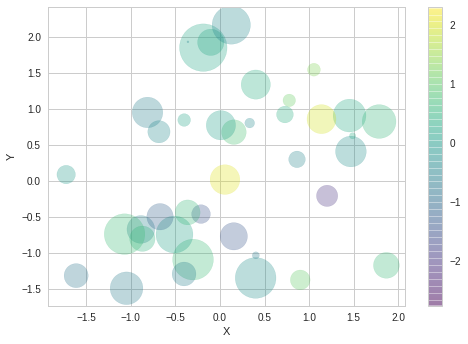

In [3]:
rng=np.random.RandomState(0)
x=rng.randn(100)
y=rng.randn(100)
colors=rng.randn(100)
sizes=1000 * rng.randn(100) 

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


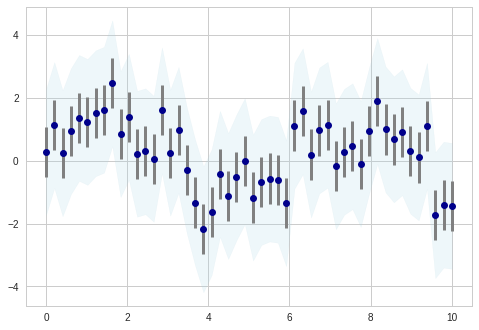

In [4]:
dy=0.8
x=np.linspace(0, 10, 50)
y=np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', color='darkblue', ecolor='gray', elinewidth=3)
plt.fill_between(x, y-2, y+2, color='lightblue', alpha=0.2)
plt.show()

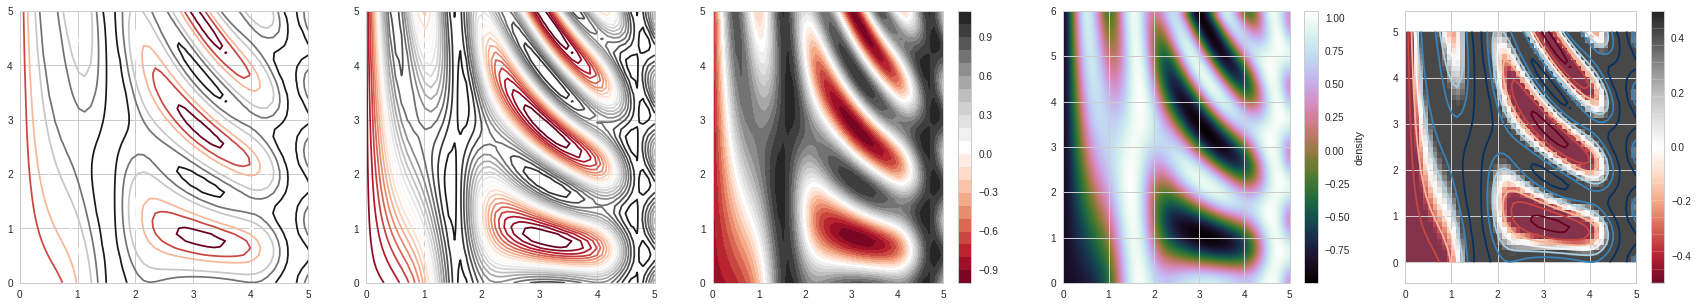

In [5]:
def f(x, y):
  return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x=np.linspace(0, 5, 50)
y=np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig, ax = plt.subplots(1, 5, figsize=(30,5))

ax[0].contour(X, Y, Z, cmap='RdGy') 

img1=ax[1].contour(X, Y, Z, 20, cmap='RdGy')


img2=ax[2].contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar(img2, ax=ax[2])

img3=ax[3].imshow(Z, extent=[0, 5, 0, 6], cmap='cubehelix', origin='lower', interpolation='bicubic')
cb=plt.colorbar(img3, ax=ax[3])
cb.set_label("density")


ax[4].contour(X, Y, Z, cmap='RdBu')
img4=ax[4].imshow(Z, cmap='RdGy', extent=[0, 5, 0, 5], origin='lower' ,alpha=0.8, vmin=-0.5, vmax=0.5)
ax[4].axis('equal')
plt.colorbar(img4, ax=ax[4])
plt.show()


[ 1  2  1  3  4  7 18 21 19 45 44 55 71 60 76 93 89 68 73 66 49 36 28 23
 19 10  5  7  5  2]


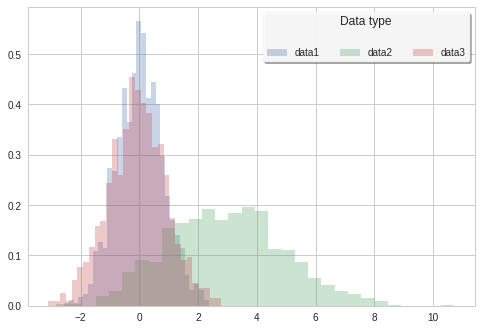

In [6]:
data1=np.random.normal(0, 0.8, 1000)
data2=np.random.normal(3, 2, 1000)
data3=np.random.randn(1000)
plt.hist(data1, bins=30, normed=True, alpha=0.3, histtype='stepfilled', label="data1")
plt.hist(data2, bins=30, normed=True, alpha=0.3, histtype='stepfilled', label="data2")
plt.hist(data3, bins=30, normed=True, alpha=0.3, histtype='stepfilled', label="data3")
plt.legend(loc='upper right', frameon=True, ncol=3, shadow=True, framealpha=0.9, fancybox=True, labelspacing=2, title='Data type', )
counts, bin_edges = np.histogram(data1, bins=30)
print(counts)
plt.show()

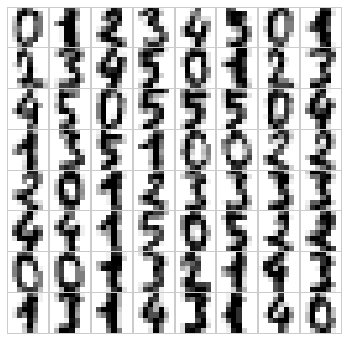

In [7]:
from sklearn.datasets import load_digits
digits=load_digits(n_class=6)
fig , ax = plt.subplots(8, 8, figsize=(6,6))
plt.subplots_adjust(hspace=0, wspace=0)

for i, axi in enumerate(ax.flat):
  axi.imshow(digits.images[i], cmap='binary')
  axi.set(xticks=[], yticks=[])
  
plt.show()

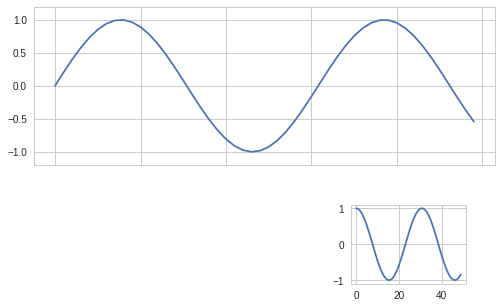

In [8]:
fig = plt.figure()
#[left, bottom, width, height]
ax1=fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2=fig.add_axes([0.65, 0.2, 0.2, 0.2])

x=np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


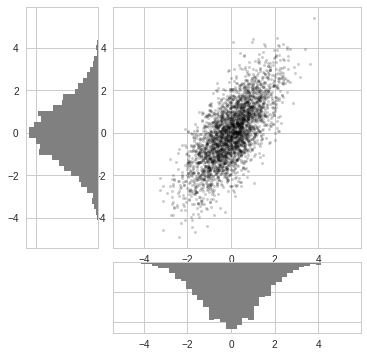

In [9]:
mean=[0,0]
cov=[[1,2],[1,1]]
x,y=np.random.multivariate_normal(mean, cov, 3000).T

fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4,hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

x_hist.hist(y, 40, histtype='stepfilled', orientation='vertical', color='gray')
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()
plt.show()

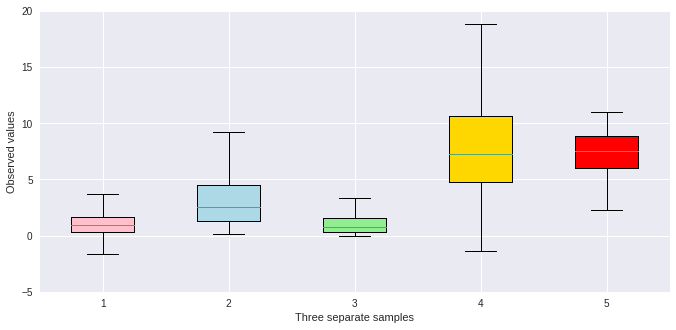

In [10]:
plt.style.use('seaborn')

numDists = 5
randomDists = ['Normal(1,1)', ' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)', 'Triangular(2,9,11)']
N = 500
np.random.seed(0)
norm = np.random.normal(1, 1, N)
logn = np.random.lognormal(1, 1, N)
expo = np.random.exponential(1, N)
gumb = np.random.gumbel(6, 4, N)
tria = np.random.triangular(2, 9, 11, N)

data = [norm, logn, expo, gumb, tria]

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, 
                 vert=True,  # vertical box alignment
                 patch_artist=True,  # fill with color
                 labels=randomDists, meanline=True)


colors = ['pink', 'lightblue', 'lightgreen', 'gold', 'red']

for i in range(len(colors)):
  bp['boxes'][i].set_facecolor(colors[i])

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)

ax1.yaxis.grid(True)
ax1.set_xlabel('Three separate samples')
ax1.set_ylabel('Observed values')
ax1.set_ylim(-5, 20)

plt.show()

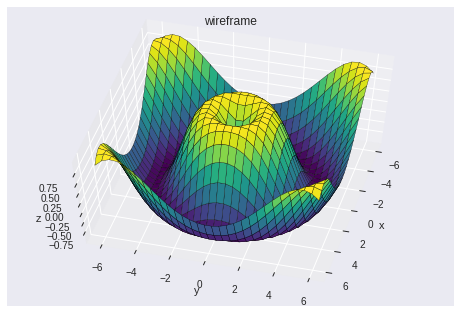

In [40]:
def f(x, y):
  return np.sin(np.sqrt(x ** 2 + y ** 2))

x=np.linspace(-6 , 6, 30)
y=np.linspace(-6 , 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='black')

ax.set_title('wireframe')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(60, 15)
fig.show()
